<a href="https://colab.research.google.com/github/sarahnabil22/cool_tech_pdf_converter/blob/main/Copy_of_sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import numpy as np
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone "https://github.com/IndoNLP/indonlu.git"

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/finance_dataset_-_Sheet1.csv")

In [ ]:
df_ext = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/financial_news_mt.csv")

In [ ]:
df_ext_2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/financial_news_mt_2.csv")

In [ ]:
df_ext_3 = pd.read_csv("/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv", sep = "\t", header = None)

In [ ]:
df = df[['label', 'content']]

In [ ]:
df.head()

,label,content
0,up,Santa Claus Rally menurut Investopedia pada Ju...
1,up,PT Perusahaan Perdagangan Indonesia (Persero) ...
2,down,Ekonomi bali terkontraksi selama pandemi salah...
3,down,Oke kita mulai dari yang masih hangat di perbi...
4,down,Kegiatan ekspor batu bara resmi dilarang oleh ...


In [ ]:
df_ext = df_ext.drop(columns = ["Unnamed: 0", "en_text"])

In [ ]:
df_ext.head()

,label,id_text
0,negative,Perusahaan industri elektronik internasional E...
1,positive,"Dengan pabrik produksi baru, perusahaan akan m..."
2,positive,Sesuai dengan strategi terbaru perusahaan untu...
3,positive,PEMBIAYAAN UNTUK PERTUMBUHAN ASPOCOMP Aspocomp...
4,positive,"Untuk kuartal terakhir tahun 2010, penjualan b..."


In [ ]:
df_ext.columns = ["label", "content"]

In [ ]:
df_ext = df_ext[df_ext["label"] != "neutral"]

In [ ]:
df_ext["content"][4]

'Untuk kuartal terakhir tahun 2010, penjualan bersih Componenta berlipat ganda menjadi EUR131 juta dari EUR76 juta untuk periode yang sama tahun sebelumnya, sementara itu bergerak ke laba sebelum pajak nol dari kerugian sebelum pajak sebesar EUR7 juta.'

In [ ]:
label_dict = {'positive':'up', 'negative':'down'}
df_ext["label"] = df_ext["label"].map(label_dict)

In [ ]:
df_ext["label"].value_counts()

up      1363
down     604
Name: label, dtype: int64

In [ ]:
df_ext_2

,label,content
0,up,Investor miliarder dan bintang Shark Tank Mark...
1,up,Pengacara Jarrett Adams baru-baru ini membantu...
2,up,Hutan Hujan Amazon terkenal di seluruh dunia s...
3,up,Polisi Newark: Tidak ada petugas yang melepask...
4,up,I 1970 dÃ¸de det 560 mennesker i den norske tr...
...,...,...
843,down,Rincian menakutkan telah muncul tentang serang...
844,down,wawancara\n\nJohannesburg - 360.000 remaja dip...
845,down,Sebuah serangan kekerasan di kota pelabuhan Is...
846,down,"Seorang anak laki-laki berusia 17 tahun, terla..."


In [ ]:
df_ext_3.columns = ["content", "label"]

In [ ]:
df_ext_3 = df_ext_3[df_ext_3["label"] != "neutral"]

In [ ]:
df_ext_3

,content,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
...,...,...
10994,tidak bosan,positive
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
df = df.iloc[0:83, :]

In [ ]:
label_dict = {'up':'up', 'down':'down'}
df['label'] = df['label'].map(label_dict)

In [ ]:
df_ext_3

,content,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
...,...,...
10994,tidak bosan,positive
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
 label_dict = {'positive':'up', 'negative':'down'}

 df_ext_3['label'].map(label_dict)

0          up
2          up
3          up
4        down
5          up
         ... 
10994      up
10995      up
10996      up
10998    down
10999      up
Name: label, Length: 9852, dtype: object

In [ ]:
df_ext_3['label']

0        positive
2        positive
3        positive
4        negative
5        positive
           ...   
10994    positive
10995    positive
10996    positive
10998    negative
10999    positive
Name: label, Length: 9852, dtype: object

In [ ]:
label_dict = {'positive':'up', 'negative':'down'}

df_ext_3['label'] = df_ext_3['label'].map(label_dict)

In [ ]:
df_ext_3

,content,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,up
2,lokasi strategis di jalan sumatera bandung . t...,up
3,betapa bahagia nya diri ini saat unboxing pake...,up
4,duh . jadi mahasiswa jangan sombong dong . kas...,down
5,"makanan beragam , harga makanan di food stall ...",up
...,...,...
10994,tidak bosan,up
10995,tidak kecewa,up
10996,enak rasa masakan nya apalagi kepiting yang me...,up
10998,"pagi pagi di tol pasteur sudah macet parah , b...",down


In [ ]:
df.head()

,label,content
0,up,Santa Claus Rally menurut Investopedia pada Ju...
1,up,PT Perusahaan Perdagangan Indonesia (Persero) ...
2,down,Ekonomi bali terkontraksi selama pandemi salah...
3,down,Oke kita mulai dari yang masih hangat di perbi...
4,down,Kegiatan ekspor batu bara resmi dilarang oleh ...


In [ ]:
df = df.append(df_ext)

In [ ]:
df = df.append(df_ext_2)

In [ ]:
df = df.append(df_ext_3)

In [ ]:
df.sample(20)

,label,content
420,down,"belajar dari kasus setya novanto mungkin , mem..."
5733,down,kecewa sangat potong rambut di kompak sudah pe...
150,up,yamien manis nya mirip banget dengan mi nursij...
913,down,"sudah lama dibaned , kalau pakai telkom dan te..."
5443,up,anak-anak suka di sini karena ada aktivitas ke...
44,up,Halo teman - teman PukulEnam! Kayaknya buat te...
1894,up,lagi di bandung makan yang berkuah yang hangat...
10594,down,kasihan ya pak nyalon terus tapi kalah melulu ...
439,up,Untuk membuktikan efisiensi sistem China Mobil...
8737,up,terima kasih id buat lotteria nya ! baru saja ...


In [ ]:
df['text_length'] = df["content"].str.split().str.len()

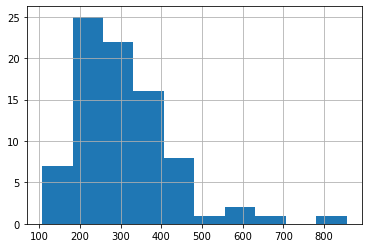

In [ ]:
df["text_length"][:83].hist(bins=10)

In [ ]:
#df = df[df["text_length"] <= 30]

In [ ]:
df['label'].value_counts()

up      8570
down    4180
Name: label, dtype: int64

In [ ]:
test=df[:83]
train=df[83:]

In [ ]:
test.iloc[2]

label                                                       down
content        Ekonomi bali terkontraksi selama pandemi salah...
text_length                                                  241
Name: 2, dtype: object

In [ ]:
test["content"][2]

'Ekonomi bali terkontraksi selama pandemi salah satunya disebabkan oleh ribetnya syarat perjalanan yang harus dipenuhi jika menggunakan jalur transportasi udara. Direktur Eksekutif CORE Indonesia menilai bahwa masyarakat yang ingin berlibur memilih destinasi wisata lain salah satunya Yogyakarta dengan syarat perjalanan tidak serumit perjalanan udara. Ekonomi bali tumbuh 2,8 persen sedangkan Yogyakarta 11,8 persen pada kuartal II 2021. "Memang ada faktor restriksi kebijakan yang mempengaruhi. Ketika transportasi udara direstriksi lebih ketat dibanding transportasi darat, ini menyebabkan permintaan jasa pariwisata tidak bisa pergi ke Bali. Maka cari daerah yang masih bisa (dikunjungi), seperti Yogyakarta," Kata Faisal dalam diskusi media Refleksi Ekonomi Akhir Tahun 2021, Rabu (29/12/2021). Yogyakarta menjadi salah satu pilihan wisatawan karena jaraknya yang lebih dekat dari lima kota besar yaitu Jabodetabek. Perjalanan menuju Yogyakarta juga dapat ditempuh menggunakan kereta atau jika m

In [ ]:
train_pos = train[train["label"] == "up"]
train_pos = train_pos.sample(4000 , replace = True)

In [ ]:
train_neg = train[train["label"] == "down"]

In [ ]:
train_all = train_pos.append(train_neg)

In [ ]:
train_all["label"].value_counts()

down    4140
up      4000
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import pandas as pd
import time

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def cleansing(text):
    text = remove_emojis(text)
    text = re.sub(r'http\S+', '', text)
    text = text.lower()
    word_list = word_tokenize(text)
    word_list = [word for word in word_list if len(word) > 2 and word.isalnum()]
    word_list = [word for word in word_list if string.punctuation not in word]
    text = ' '.join(word_list)
    return text

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['content'] = train['content'].apply(cleansing)
test['content'] = test['content'].apply(cleansing)

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

tokenizer = BertTokenizer.from_pretrained("cahya/bert2gpt-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model = EncoderDecoderModel.from_pretrained("cahya/bert2gpt-indonesian-summarization")

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

In [ ]:
def machine_summarization(article):
  input_ids = tokenizer.encode(article, return_tensors='pt', 
                               padding=True, truncation=True, 
                               max_length=512, add_special_tokens = True)
  summary_ids = model.generate(input_ids,
              min_length=5,
              max_length=20, 
              early_stopping=True,
              no_repeat_ngram_size=2,
              use_cache=True,
              do_sample = True,
              top_k = 50,
              top_p = 0.95)

  summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  print(summary_text)
  return summary_text


In [ ]:
%%time
summary = machine_summarization('sudah hampir dua tahun kita menghadapi pandemi ternyata dampaknya pun berhasil membuat raksasa terseok awal februari 2022 ini saja kita sudah mendapat berita tentang maskapai penerbangan raksasa indonesia yang dikabarkan kolaps dan akan melakukan phk massal bagaimana fakta dan kronologinya garuda indonesia bangkrut isu garuda indonesia tbk giaa akan bangkrut mencuat saat diketahui bahwa perusahaan tersebut akan menemui kementerian ketenagakerjaan kemnaker ')

sudah hampir dua tahun kita menghadapi pandemi ternyata dampaknya pun berhasil membuat raksasa terseok awal februari 2022 ini
CPU times: user 10.8 s, sys: 170 ms, total: 11 s
Wall time: 5.83 s


In [ ]:
summary

'sudah hampir dua tahun kita menghadapi pandemi ternyata dampaknya pun berhasil membuat raksasa terseok awal februari 2022 ini'

In [ ]:
%%time

summarized_content = [machine_summarization(text) for text in df['content'].values[:83]]

santa otentik rally menurut investopedia pada jumat santa keseimbangan wyly atau reli sinterklas
perusahaan perdagangan indonesia persero berhasil mengekspor lagi kopi mesir kopi yang berasal dari bandar lampung ini dikirim pada desember
ekonomi bali terkontraksi selama pandemi salah satunya disebabkan oleh ribetnya syarat perjalanan yang harus dipenuhi
oke kita mulai dari yang masih hangat perbtapak pada desember mendatang muhammad rachmat kaimuddin
kegiatan ekspor batu bara resmi dilarang oleh pemerintah selama bulan januari 2022 yang diterbitkan oleh kementerian esdm melalui
inflasi sebesar yang terjadi turki tidak lepas dari jatuhnya nilai lira turki terhadap dollar as lire anj
dulu goto sempat digugat atas permasalahan merek dagang dengan tuntutan sebesar triliun rupiah belum hilang dari ingatan
aset digital termasuk transaksi digital yang dimiliki oleh wajib pajak harus tercantum dalam surat pemberitahuan spt tahunan.
richards telah dibeli harga terendah semenjak september lalu h

In [ ]:
test["content"] = summarized_content
test["content"] = test["content"].apply(cleansing)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.to_csv("dataframe_all.csv")

In [ ]:
test["label"].value_counts()

up      43
down    40
Name: label, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
vocab_size = 30000
embedding_dim = 256
max_length = 50
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
label2idx = {'down': 1 ,   'up': 0}
idx2label = {y:x for x,y in label2idx.items()}

In [ ]:
idx2label

{0: 'up', 1: 'down'}

In [ ]:
train['label_tf'] = train['label'].map(label2idx)
test['label_tf'] = test['label'].map(label2idx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # di inference cukup load tokenizer

tokenizer.fit_on_texts(df['content'].tolist())
word_index = tokenizer.word_index

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train['content'].tolist())
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding = padding_type, truncating = trunc_type)
testing_sentences = tokenizer.texts_to_sequences(test['content'].tolist())
testing_padded = pad_sequences(testing_sentences, maxlen=max_length, padding = padding_type, truncating = trunc_type)

In [ ]:
training_labels_final = np.array(train['label_tf'].tolist())
testing_labels_final = np.array(test['label_tf'].tolist())

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim , input_length = max_length),
    #tf.keras.layers.Dropout(0.9) ,
   # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.MaxPooling1D(pool_size = 4 ) , 
   #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)) ,
    #tf.keras.layers.LSTM(16) , 
    tf.keras.layers.Dropout(0.5) , 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
     #tf.keras.layers.Dense(64 , activation='relu') , 
    tf.keras.layers.Dense(16 , activation='relu'),
    tf.keras.layers.Dropout(0.5) ,
   tf.keras.layers.Dense(256 , activation='relu'),
    tf.keras.layers.Dense( 1 , activation='sigmoid')
])

callbacks = ModelCheckpoint("best_model.h5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer= optimizers.Adam(learning_rate = 0.001) , 
              metrics=['accuracy']) 
model.summary()
# cross entropy = negative log likelihood

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 256)           7680000   
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 8)                8352      
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               4352      
                                                        

In [ ]:
testing_padded

array([[ 3253,  3552,  5928, ...,     0,     0,     0],
       [  111,  1041,   225, ...,     0,     0,     0],
       [  808,  1827, 21466, ...,     0,     0,     0],
       ...,
       [  239,   166, 21559, ...,     0,     0,     0],
       [ 1179,   835,  1588, ...,     0,     0,     0],
       [ 1291,  1608,  1936, ...,     0,     0,     0]], dtype=int32)

In [ ]:
testing_labels_final

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
num_epochs = 10
history = model.fit(train_padded, training_labels_final, batch_size = 128 ,  
                    epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),
              callbacks=[callbacks])

Epoch 1/10
96/99 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.7613
Epoch 1: val_accuracy improved from -inf to 0.55422, saving model to best_model.h5
99/99 [==============================] - 11s 21ms/step - loss: 0.4984 - accuracy: 0.7647 - val_loss: 0.8177 - val_accuracy: 0.5542
Epoch 2/10
96/99 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8975
Epoch 2: val_accuracy did not improve from 0.55422
99/99 [==============================] - 1s 11ms/step - loss: 0.2807 - accuracy: 0.8982 - val_loss: 0.9628 - val_accuracy: 0.5542
Epoch 3/10
96/99 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9323
Epoch 3: val_accuracy did not improve from 0.55422
99/99 [==============================] - 1s 11ms/step - loss: 0.1954 - accuracy: 0.9319 - val_loss: 1.1164 - val_accuracy: 0.5542
Epoch 4/10
96/99 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9538
Epoch 4: val_accuracy did not improve from 0.554

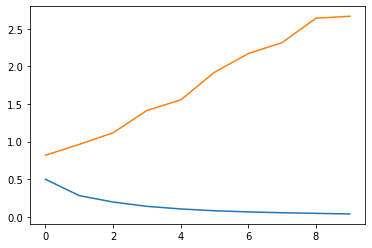

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
model.evaluate(testing_padded, testing_labels_final, batch_size = 1)

83/83 [==============================] - 1s 4ms/step - loss: 2.6681 - accuracy: 0.5181


[2.6680567264556885, 0.5180723071098328]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


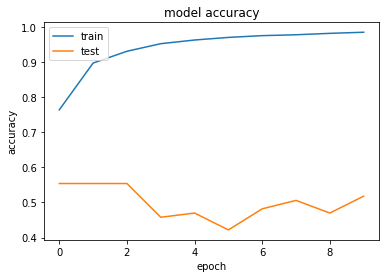

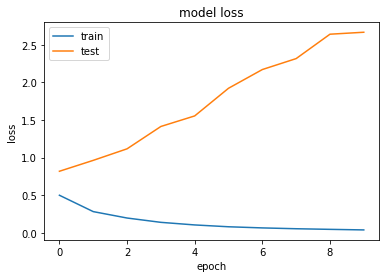

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
"""model.save('model.h5')"""

"model.save('model.h5')"

In [ ]:
"""if __name__ == '__main__':
    model.save("model.h5")"""

In [ ]:
"""if __name__ == '__main__':
    model.save("model.pkl")"""

In [ ]:
"""import io, json
tokenizer_json = tokenizer.to_json()
with io.open('saved_model/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))"""

In [ ]:
"""with open('saved_model/label2idx.json', 'w') as fp:
    json.dump(label2idx, fp)
with open('saved_model/idx2label.json', 'w') as fp:
    json.dump(idx2label, fp)"""

In [ ]:
#def tf_prediction(input_text, model, tokenizer):
   # input_sequence = tokenizer.texts_to_sequences([input_text])
   # input_padded = pad_sequences(input_sequence, maxlen=50, padding = 'post', truncating = 'post')
   # predicted = model(input_padded)
   # print(predicted)
   # label_predicted = np.argmax(predicted[0])
   # return label_predicted, predicted[0][label_predicted]

#def tf_prediction_batch(list_text, model, tokenizer):
  #  input_sequence = tokenizer.texts_to_sequences(list_text)
   # input_sequence = pad_sequences(input_sequence, maxlen=50, padding = 'post', truncating = 'post')
   # print(input_sequence.shape)
   # predicted = model(input_sequence)
   # label_predicted = np.argmax(predicted, axis = 1)
   # return predicted, label_predicted

In [ ]:
#output_label = tf_prediction('krisis moneter indonesia', model, tokenizer )

In [ ]:
#output_label

In [ ]:
"""idx2label = {y:x for x,y in label2idx.items()}"""

In [ ]:
"""idx2label[output_label[0]]"""

In [ ]:
!cp "/content/best_model.h5" "/content/gdrive/MyDrive/Flask NLP"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/tokenizer.pickle" "/content/gdrive/MyDrive/Flask NLP"